# **Data Analysis of Courses offered by Udemy and edX** 


This project is a data analysis of online courses available on two popular platforms, Udemy and edX. The goal of this analysis is to gain insights into the courses offered by these platforms based on factors such as price, subject, and number of subscribers. The data for this project was sourced from Kaggle, which provides information on over 13,000 courses from Udemy and more than 3,800 courses from edX.

In this project, I used Python libraries such as Pandas, Matplotlib, and Seaborn to analyze and visualize the data. The project includes a variety of data cleaning techniques, data manipulation, and data visualization methods to gain insights into the data. Some of the key questions that this project aims to answer include:

* What are the most popular subjects on Udemy and edX?
* What insights can we gain from analyzing the enrollment trends of courses over time? 
* How does the price of courses vary by subject and platform? 
* Which platform has a higher average number of subscribers per course?

Through this analysis, we hope to gain a better understanding of the online course landscape and provide insights that can be useful to both learners and course creators.






**Analysis of Udemy Courses**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as path
import matplotlib.pyplot as pplt


In [ ]:
udemy_course_des=pd.read_csv('/udemy_courses.csv') 
udemy_course_des.tail(5) 

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [ ]:
udemy_course_des.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [ ]:
udemy_course_des['published_timestamp'] = pd.to_datetime(udemy_course_des['published_timestamp'])
udemy_course_des['level'] = udemy_course_des['level'].astype('category')
udemy_course_des['level'] = udemy_course_des['level'].cat.codes
udemy_course_des['is_paid'] = udemy_course_des['is_paid'].astype('category')
udemy_course_des['is_paid'] = udemy_course_des['is_paid'].cat.codes
udemy_course_des

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [ ]:
udemy_course_des.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [ ]:
udemy_course_des['subject'].value_counts()

Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

In [ ]:
udemy_course_des_csv=udemy_course_des.to_csv("udem_course_des_for_bq.csv")


In [ ]:
path('udemy_course_des.db').touch()
udemy_conn=sqlite3.connect('udemy_course_des.db')
udemy_cursor=udemy_conn.cursor()

In [ ]:
udemy_course_des.to_sql('udemy_course_des', udemy_conn, if_exists='append', index=False)

3678

In [ ]:
udemy_des_init_query = pd.read_sql(''' SELECT * FROM udemy_course_des ''', udemy_conn)
udemy_des_init_query

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09 16:34:20+00:00,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,3,2.5,2016-12-19 19:26:30+00:00,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30 20:07:24+00:00,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,3,2.0,2016-12-13 14:57:18+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
14707,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,1,100,1040,14,21,0,2.0,2016-06-14 17:36:46+00:00,Web Development
14708,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,1,25,306,3,42,1,3.5,2017-03-10 22:24:30+00:00,Web Development
14709,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,1,40,513,169,48,0,3.5,2015-12-30 16:41:42+00:00,Web Development
14710,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,1,50,300,31,38,0,3.0,2016-08-11 19:06:15+00:00,Web Development


In [ ]:
data_query = pd.read_sql(''' SELECT course_title, price, content_duration, num_subscribers
                                      FROM udemy_course_des
                                      WHERE subject == 'Web Development'
                                      ORDER BY price DESC LIMIT 15 ''', udemy_conn)
data_query

,course_title,price,content_duration,num_subscribers
0,Web Development Masterclass - Complete Certifi...,200,19.5,4090
1,Learn JavaScript for beginners,200,1.5,15276
2,Ultimate Web Developer Course Build 10 Website...,200,32.5,9359
3,Rapid Website Design with Bootstrap,200,1.0,14842
4,Git a Web Developer Job: Mastering the Modern ...,200,15.0,5809
5,Advanced Javascript,200,3.5,6601
6,Complete Codeigniter: From Beginner to Advanced,200,3.0,2786
7,Complete React JS web developer with ES6 - Bui...,200,12.0,952
8,Dynamic JavaScript Master Class AJAX JSON Simp...,200,4.5,9773
9,Angular 2 & TypeScript Beginner Web Development,200,19.5,5211


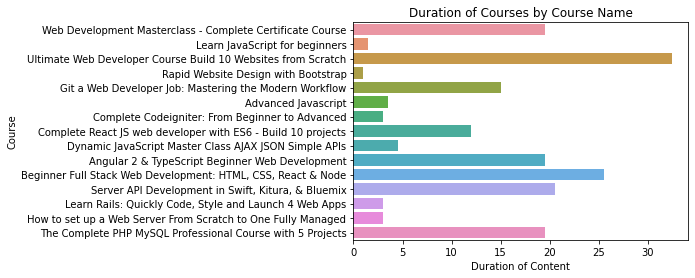

In [ ]:
sns.barplot(x='content_duration',y='course_title',data= data_query)
plt.title("Duration of Courses by Course Name")
plt.xlabel("Duration of Content")
plt.ylabel("Course")
plt.show()

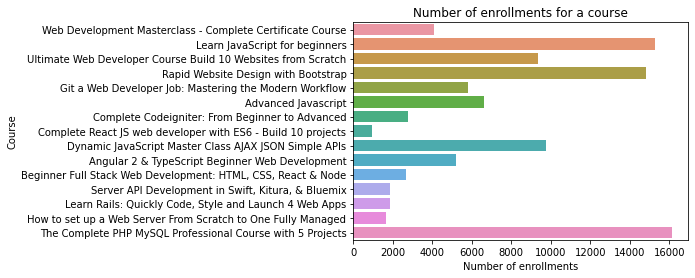

In [ ]:
sns.barplot(x='num_subscribers',y='course_title',data= data_query)
plt.title("Number of enrollments for a course")
plt.xlabel("Number of enrollments")
plt.ylabel("Course")
plt.show()

In [ ]:
data_query.mean()

<ipython-input-92-b9a0e2f6909a>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_query.mean()


price                200.000000
content_duration      12.233333
num_subscribers     6592.866667
dtype: float64

In [ ]:
data_analysis_finance = pd.read_sql(''' SELECT course_title, price, content_duration, num_subscribers
                                       FROM udemy_course_des
                                       WHERE course_title LIKE '%Finance'
                                       ORDER BY price DESC  ''', udemy_conn)
data_analysis_finance

,course_title,price,content_duration,num_subscribers
0,Take Your Career to the Next Level with MBA Fi...,50,2.000000,618
1,Take Your Career to the Next Level with MBA Fi...,50,2.000000,618
2,Take Your Career to the Next Level with MBA Fi...,50,2.000000,618
3,Take Your Career to the Next Level with MBA Fi...,50,2.000000,618
4,Level 1 2014 CFA® Program – Corporate Finance,40,3.000000,204
5,Level 1 2014 CFA® Program – Corporate Finance,40,3.000000,204
6,Level 1 2014 CFA® Program – Corporate Finance,40,3.000000,204
7,Level 1 2014 CFA® Program – Corporate Finance,40,3.000000,204
8,QuickBooks Online : Inventory Management For N...,35,0.666667,8
9,QuickBooks Online : Inventory Management For N...,35,0.666667,8


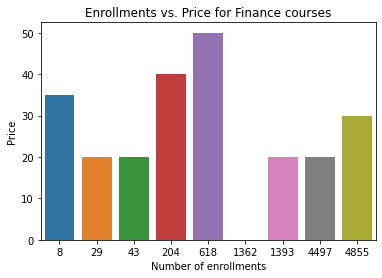

In [ ]:
sns.barplot(x = 'num_subscribers', y = 'price', data = data_analysis_finance)
plt.title("Enrollments vs. Price for Finance courses")
plt.xlabel("Number of enrollments")
plt.ylabel("Price")
plt.show()

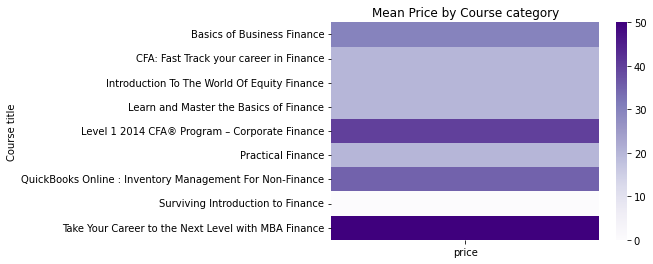

In [ ]:
table = pd.pivot_table(data_analysis_finance, values='price', index=['course_title'], aggfunc=np.mean)

# create a heatmap of the mean price by subject category
sns.heatmap(table , cmap='Purples')
plt.title('Mean Price by Course category')

plt.ylabel('Course title')
plt.show()


In [ ]:
data_analysis_tot = pd.read_sql(''' SELECT SUM(num_subscribers) AS total_enrollments, COUNT(course_title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM udemy_course_des 
                                    WHERE subject == 'Graphic Design'
                                    ORDER BY price DESC ''', udemy_conn)
data_analysis_tot

,total_enrollments,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,4252592,2412,57.827529,0,200


In [ ]:
data_analysis_tot = pd.read_sql(''' SELECT SUM(num_subscribers) AS total_enrollments, COUNT(course_title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM udemy_course_des 
                                    WHERE subject == 'Musical Instruments'
                                    ORDER BY price DESC ''', udemy_conn)
data_analysis_tot

,total_enrollments,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,3386756,2720,49.558824,0,200


In [ ]:
data_analysis_total = pd.read_sql(''' SELECT SUM(num_subscribers) AS total_enrollments, COUNT(course_title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM udemy_course_des 
                                    ORDER BY price DESC ''', udemy_conn)
data_analysis_total

,total_enrollments,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,47036480,14712,66.049483,0,200


In [ ]:
by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM udemy_course_des) AS subject_pct
                             FROM udemy_course_des
                             GROUP BY subject
                             ORDER BY subject_pct DESC ''', udemy_conn)
by_subject

,subject,subject_count,subject_pct
0,Web Development,4800,32
1,Business Finance,4780,32
2,Musical Instruments,2720,18
3,Graphic Design,2412,16


In [ ]:
by_subject_csv = by_subject.to_csv('by_subject_csv.csv')

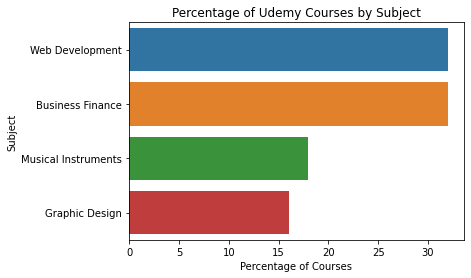

In [ ]:
sns.barplot(x = 'subject_pct', y = 'subject', data = by_subject)
plt.title("Percentage of Udemy Courses by Subject")
plt.xlabel("Percentage of Courses")
plt.ylabel("Subject")
plt.show()

In [ ]:
udemy_by_price = pd.read_sql(''' SELECT price, COUNT(price) AS price_count,
                           100 * COUNT(price) / (SELECT COUNT(*) FROM udemy_course_des) AS price_pct
                           FROM udemy_course_des
                           GROUP BY price
                           ORDER BY price_pct DESC LIMIT 10 ''', udemy_conn)
udemy_by_price

,price,price_count,price_pct
0,20,3320,22
1,50,1872,12
2,200,1180,8
3,0,1240,8
4,40,868,5
5,95,608,4
6,30,664,4
7,25,616,4
8,195,508,3
9,100,532,3


In [ ]:
udemy_price_pct_csv = udemy_by_price.to_csv('udemy_price_pct.csv')

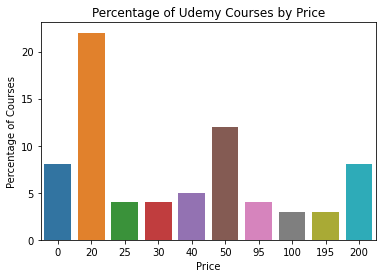

In [ ]:
sns.barplot(x = 'price', y = 'price_pct', data = udemy_by_price)
plt.title("Percentage of Udemy Courses by Price")
plt.xlabel("Price")
plt.ylabel("Percentage of Courses")
plt.show()

In [ ]:
by_subs_subject = pd.read_sql(''' SELECT course_title, subject, num_subscribers FROM udemy_course_des
                          GROUP BY subject
                          ORDER BY num_subscribers DESC ''', udemy_conn)

by_subs_subject

,course_title,subject,num_subscribers
0,Learn Web Designing & HTML5/CSS3 Essentials in...,Web Development,43285
1,"7 Ways A Beginner Guitarist Can Sound Better, ...",Musical Instruments,4529
2,Anatomy and Figure Drawing for Beginners,Graphic Design,2252
3,Ultimate Investment Banking Course,Business Finance,2147


In [ ]:
subject_hundred = pd.read_sql(''' SELECT subject, AVG(price) as avg_price_subject
                                  FROM udemy_course_des
                                  WHERE price > 100.0 
                                  GROUP BY subject
                                  ORDER BY avg_price_subject DESC LIMIT 10 ''' , udemy_conn)
subject_hundred = subject_hundred.round(2)
subject_hundred

,subject,avg_price_subject
0,Business Finance,177.59
1,Web Development,175.26
2,Graphic Design,174.53
3,Musical Instruments,168.88


In [ ]:
tot_price = pd.read_sql(''' SELECT subject, num_subscribers, AVG(price) AS avg_course_price, SUM(price) AS total_revenue
                                           FROM udemy_course_des
                                           GROUP BY subject ''', udemy_conn)
tot_price

,subject,num_subscribers,avg_course_price,total_revenue
0,Business Finance,2147,68.552301,327680
1,Graphic Design,2252,57.827529,139480
2,Musical Instruments,4529,49.558824,134800
3,Web Development,43285,77.033333,369760


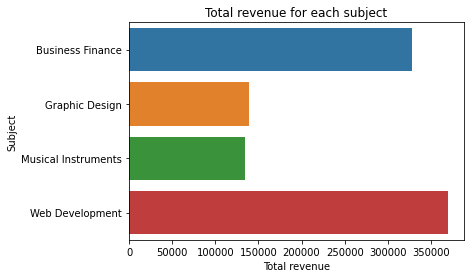

In [ ]:
sns.barplot(x = 'total_revenue', y = 'subject', data = tot_price)
plt.title("Total revenue for each subject")
plt.xlabel("Total revenue")
plt.ylabel("Subject")
plt.show()

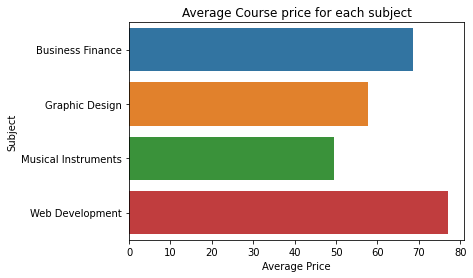

In [ ]:
sns.barplot(x = 'avg_course_price', y = 'subject', data = tot_price)
plt.title("Average Course price for each subject")
plt.xlabel("Average Price")
plt.ylabel("Subject")
plt.show()

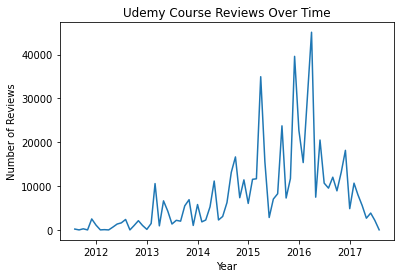

In [ ]:
udemy_course_des.set_index('published_timestamp', inplace=True)

# Resample the data by month and count the number of course reviews
reviews_by_month = udemy_course_des['num_reviews'].resample('M').sum()

# Plot the number of course reviews over time
sns.lineplot(data=reviews_by_month)
plt.title('Udemy Course Reviews Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.show()

**Analysis of edX Courses**

In [ ]:
edx_course_descriptions=pd.read_csv('/edx_courses.csv')
edx_course_descriptions.tail(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https://www.edx.org/course/cities-and-the-chal...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",NaN,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4 Weeks,FREE-Add a Verified Certificate for $79 USD,This course is part two of the MathTrackX XSer...,NaN,https://www.edx.org/course/mathtrackx-special-...


In [ ]:
edx_course_descriptions.dtypes

title                 object
summary               object
n_enrolled            object
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
course_syllabus       object
course_url            object
dtype: object

In [ ]:
edx_course_descriptions['n_enrolled'] = edx_course_descriptions['n_enrolled'].str.replace(',','')
edx_course_descriptions['price'] = edx_course_descriptions['price'].str.replace('FREE-Add a Verified Certificate for', '')
edx_course_descriptions['price'] = edx_course_descriptions['price'].str.replace('$', '')
edx_course_descriptions['price'] = edx_course_descriptions['price'].str.replace('USD', '')
edx_course_descriptions['course_length'] = edx_course_descriptions['course_length'].str.replace('Weeks', '')


<ipython-input-212-6c929972c05c>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  edx_course_descriptions['price'] = edx_course_descriptions['price'].str.replace('$', '')


In [ ]:
edx_course_descriptions['n_enrolled'] = edx_course_descriptions['n_enrolled'].fillna(0)
edx_course_descriptions['n_enrolled'] = edx_course_descriptions['n_enrolled'].astype(int)
edx_course_descriptions['price'] = edx_course_descriptions['price'].astype(float)
edx_course_descriptions['course_length'] = edx_course_descriptions['course_length'].astype(int)
edx_course_descriptions.isna().sum()

title                   0
summary                53
n_enrolled              0
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [ ]:
edx_course_descriptions['summary'] = edx_course_descriptions['summary'].fillna('Unlisted')
edx_course_descriptions['instructors'] = edx_course_descriptions['instructors'].fillna('Unlisted')
edx_course_descriptions['subtitles'] = edx_course_descriptions['subtitles'].fillna('English')
edx_course_descriptions['course_description'] = edx_course_descriptions['course_description'].fillna('Unlisted')
edx_course_descriptions['course_syllabus'] = edx_course_descriptions['course_syllabus'].fillna('Unlisted')
edx_course_descriptions.tail(5)

In [ ]:
del edx_course_descriptions['course_url']
edx_course_descriptions.tail(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10,25.0,The high rates of crime and violence are two o...,NaN
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12,139.0,Are you an original designer? Or a DIY fancier...,NaN
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...
974,MathTrackX: Special Functions,"Understand trigonometric, exponential and loga...",0,Self-paced on your time,University of Adelaide,Dr David Butler,Introductory,Math,English,English,3–6 hours per week,4,79.0,This course is part two of the MathTrackX XSer...,NaN


In [ ]:
edx_course_descriptions['Level'] = edx_course_descriptions['Level'].astype('category')
edx_course_descriptions['Level'] = edx_course_descriptions['Level'].cat.codes
edx_course_descriptions['course_type'] = edx_course_descriptions['course_type'].astype('category')
edx_course_descriptions['course_type'] = edx_course_descriptions['course_type'].cat.codes
edx_course_descriptions.dtypes

title                  object
summary                object
n_enrolled              int64
course_type              int8
institution            object
instructors            object
Level                    int8
subject                object
language               object
subtitles              object
course_effort          object
course_length           int64
price                 float64
course_description     object
course_syllabus        object
dtype: object

In [ ]:
edx_course_descriptions.describe()

,n_enrolled,course_type,Level,course_length,price
count,9.750000e+02,975.000000,975.000000,975.000000,975.000000
mean,4.670523e+04,0.940513,1.547692,6.705641,100.465497
std,1.128239e+05,0.236656,0.653165,3.150327,69.572175
min,0.000000e+00,0.000000,0.000000,1.000000,5.000000
25%,8.529500e+03,1.000000,1.000000,4.000000,49.000000
50%,1.968700e+04,1.000000,2.000000,6.000000,79.000000
75%,4.891850e+04,1.000000,2.000000,8.000000,149.000000
max,2.442271e+06,1.000000,2.000000,18.000000,450.000000


In [ ]:
edx_course_descriptions['subject'].value_counts()

Computer Science                166
Business & Management           164
Data Analysis & Statistics       72
Humanities                       64
Engineering                      58
Social Sciences                  51
Economics & Finance              46
Communication                    39
Biology & Life Sciences          35
Language                         34
Math                             31
Medicine                         31
Education & Teacher Training     29
History                          20
Physics                          18
Environmental Studies            16
Art & Culture                    12
Health & Safety                  11
Law                              10
Science                          10
Design                            8
Energy & Earth Sciences           8
Electronics                       7
Music                             7
Food & Nutrition                  6
Philosophy & Ethics               6
Chemistry                         5
Architecture                

In [ ]:
edx_course_description_csv = edx_course_descriptions.to_csv("edx_course_description_for_bq.csv")
path('edx_course_descriptions.db').touch()
edx_conn = sqlite3.connect('edx_course_descriptions.db')
edx_cursor = edx_conn.cursor()
edx_course_descriptions.to_sql('edx_course_descriptions', edx_conn, if_exists='append', index=False)
edx_description_init_query = pd.read_sql(''' SELECT * FROM edx_course_descriptions ''', edx_conn)
edx_description_init_query

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus
0,How to Learn Online,Learn essential strategies for successful onli...,124980,1,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,2,Education & Teacher Training,English,English,2–3 hours per week,2,49.0,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,1,The University of Michigan,Charles Severance,2,Computer Science,English,English,2–4 hours per week,7,49.0,This course aims to teach everyone the basics ...,Unlisted
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,1,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,2,Computer Science,English,English,6–18 hours per week,12,90.0,"This is CS50x , Harvard University's introduct...",Unlisted
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,0,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,1,Data Analysis & Statistics,English,English,10–15 hours per week,13,199.0,"In the last decade, the amount of data availab...",Unlisted
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,1,"University of California, Berkeley",Stephan Sorger,2,Computer Science,English,English,5–7 hours per week,4,249.0,Begin your journey in a new career in marketin...,Unlisted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,1,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,1,Social Sciences,English,English,4–5 hours per week,10,25.0,The high rates of crime and violence are two o...,None
3896,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,1,Tsinghua University,Yuehua Nie,2,Art & Culture,中文,"English, 中文",3–5 hours per week,12,139.0,Are you an original designer? Or a DIY fancier...,None
3897,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,1,École polytechnique fédérale de Lausanne,Wulfram Gerstner,0,Biology & Life Sciences,English,English,4–6 hours per week,6,139.0,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...
3898,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,1,SDG Academy,Jeffrey D. Sachs,2,Environmental Studies,English,English,1–2 hours per week,1,25.0,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...


In [ ]:
data_analysis_query = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution 
                                      FROM edx_course_descriptions
                                      WHERE subject == 'Data Analysis & Statistics'
                                      ORDER BY price DESC LIMIT 15 ''', edx_conn)
data_analysis_query

,title,price,course_effort,n_enrolled,institution
0,Python for Data Science,350.0,8–10 hours per week,266978,"The University of California, San Diego"
1,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
2,Machine Learning Fundamentals,350.0,8–10 hours per week,82008,"The University of California, San Diego"
3,Python for Data Science,350.0,8–10 hours per week,266978,"The University of California, San Diego"
4,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
5,Machine Learning Fundamentals,350.0,8–10 hours per week,82008,"The University of California, San Diego"
6,Python for Data Science,350.0,8–10 hours per week,266978,"The University of California, San Diego"
7,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
8,Machine Learning Fundamentals,350.0,8–10 hours per week,82008,"The University of California, San Diego"
9,Python for Data Science,350.0,8–10 hours per week,266978,"The University of California, San Diego"


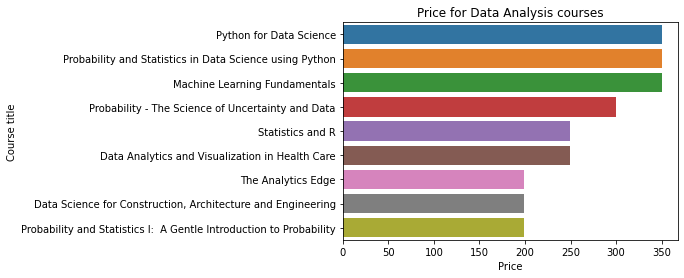

In [ ]:
sns.barplot(x = 'price', y = 'title', data = data_analysis_query)
plt.title("Price for Data Analysis courses")
plt.xlabel("Price")
plt.ylabel("Course title")
plt.show()

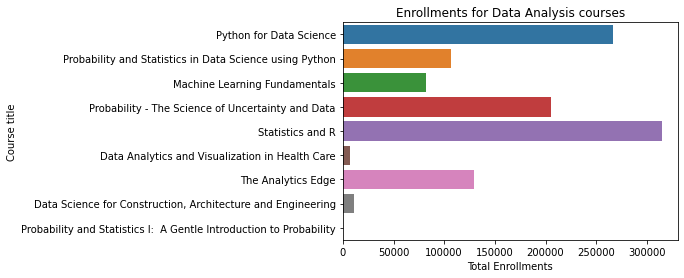

In [ ]:
sns.barplot(x = 'n_enrolled', y = 'title', data = data_analysis_query)
plt.title("Enrollments for Data Analysis courses")
plt.xlabel("Total Enrollments")
plt.ylabel("Course title")
plt.show()

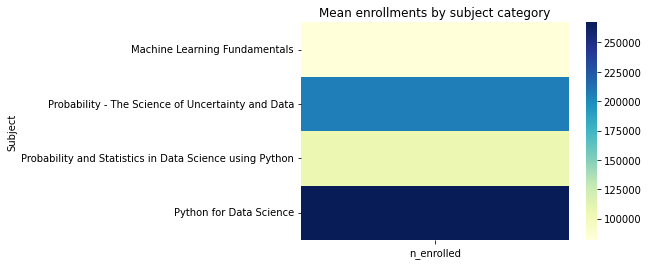

In [ ]:
table = pd.pivot_table(data_analysis_query, values='n_enrolled', index=['title'], aggfunc=np.mean)

# create a heatmap of the mean price by subject category
sns.heatmap(table, cmap='YlGnBu')
plt.title('Mean enrollments by subject category')
plt.ylabel("Subject")

plt.show()


<ipython-input-129-1687bab7d4f4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_query,ci=False)


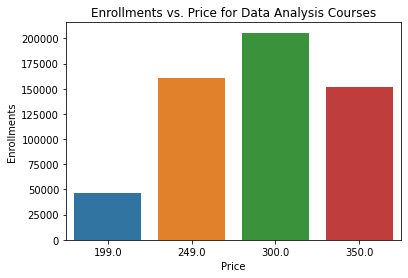

In [ ]:
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_query,ci=False)
plt.title("Enrollments vs. Price for Data Analysis Courses")
plt.xlabel("Price")
plt.ylabel("Enrollments")
plt.show()

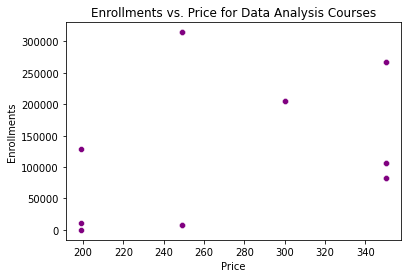

In [ ]:
sns.scatterplot(data=data_analysis_query, x='price', y='n_enrolled', color='purple', sizes=[50, 200])
plt.title("Enrollments vs. Price for Data Analysis Courses")
plt.xlabel("Price")
plt.ylabel("Enrollments")
plt.show()

In [ ]:
data_analysis_query.mean() 

<ipython-input-131-7a022633a757>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_analysis_query.mean()


price            286.2
n_enrolled    140414.8
dtype: float64

In [ ]:
data_analysis_python = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edx_course_descriptions
                                       WHERE title LIKE '%Python'
                                       ORDER BY price DESC  ''', edx_conn)
data_analysis_python

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
1,Probability and Statistics in Data Science usi...,350.0,10–12 hours per week,106286,"The University of California, San Diego"
2,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University
3,Analytics in Python,249.0,8–10 hours per week,82210,Columbia University
4,CS50's Introduction to Artificial Intelligence...,199.0,10–30 hours per week,258006,Harvard University
5,Data Science: Computational Thinking with Python,199.0,4–6 hours per week,78232,"University of California, Berkeley"
6,CS50's Introduction to Artificial Intelligence...,199.0,10–30 hours per week,258006,Harvard University
7,Data Science: Computational Thinking with Python,199.0,4–6 hours per week,78232,"University of California, Berkeley"
8,Estructuras de Datos con Python,49.0,2–4 hours per week,0,The University of Michigan
9,Advanced Algorithmics and Graph Theory with Py...,49.0,2–4 hours per week,13502,IMT


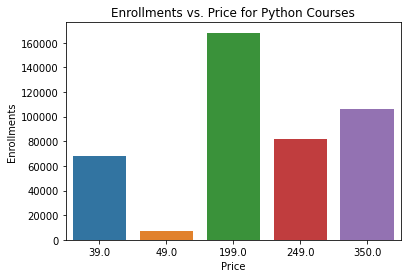

In [ ]:
sns.barplot(x = 'price', y = 'n_enrolled', data = data_analysis_python , errorbar=('ci',False))
plt.title("Enrollments vs. Price for Python Courses")
plt.xlabel("Price")
plt.ylabel("Enrollments")
plt.show()

In [ ]:
data_analysis_prog = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                       FROM edx_course_descriptions
                                       WHERE title LIKE '%Programming'
                                       ORDER BY price DESC  ''', edx_conn)
data_analysis_prog

,title,price,course_effort,n_enrolled,institution
0,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
1,Basics of Computing and Programming,200.0,6–8 hours per week,37045,New York University
2,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
3,Object-Oriented Programming,149.0,6–8 hours per week,93633,IITBombay
4,Computing in Python I: Fundamentals and Proced...,99.0,9–10 hours per week,141966,The Georgia Institute of Technology
5,AI Chatbots without Programming,99.0,2–4 hours per week,35440,IBM
6,Computing in Python I: Fundamentals and Proced...,99.0,9–10 hours per week,141966,The Georgia Institute of Technology
7,AI Chatbots without Programming,99.0,2–4 hours per week,35440,IBM


In [ ]:
data_analysis_stat = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edx_course_descriptions
                                     WHERE title LIKE '%Statistics'
                                     ORDER BY price DESC ''', edx_conn)
data_analysis_stat

,title,price,course_effort,n_enrolled,institution
0,BioStatistics,79.0,5–10 hours per week,14937,Doane University
1,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide
2,BioStatistics,79.0,5–10 hours per week,14937,Doane University
3,MathTrackX: Statistics,79.0,3–6 hours per week,0,University of Adelaide
4,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund
5,Public Sector Debt Statistics,25.0,6–8 hours per week,0,The International Monetary Fund
6,Compilation Basics for Macroeconomic Statistics,25.0,3–6 hours per week,6570,The International Monetary Fund
7,Public Sector Debt Statistics,25.0,6–8 hours per week,0,The International Monetary Fund


In [ ]:
data_analysis_prob = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                     FROM edx_course_descriptions
                                     WHERE title LIKE '%Probability' AND title NOT LIKE '%MathTrackX: Probability'
                                     ORDER BY price DESC ''', edx_conn)
data_analysis_prob

,title,price,course_effort,n_enrolled,institution
0,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
1,Probability and Statistics I: A Gentle Introd...,199.0,6–10 hours per week,0,The Georgia Institute of Technology
2,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
3,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
4,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
5,Introduction to Probability,99.0,5–10 hours per week,97291,Harvard University
6,Data Science: Probability,49.0,1–2 hours per week,135859,Harvard University
7,Data Science: Probability,49.0,1–2 hours per week,135859,Harvard University


In [ ]:
comp_sci_query = pd.read_sql(''' SELECT title, price, course_effort, n_enrolled, institution
                                 FROM edx_course_descriptions WHERE subject == 'Computer Science'
                                 ORDER BY price DESC LIMIT 15 ''', edx_conn)
comp_sci_query

,title,price,course_effort,n_enrolled,institution
0,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
1,Information Technology Foundations,399.6,9–10 hours per week,6388,Western Governors University
2,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
3,Driving Digital Innovation through Experimenta...,399.0,3–5 hours per week,16904,Boston University
4,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
5,Machine Learning with Python: from Linear Mode...,300.0,10–14 hours per week,85561,Massachusetts Institute of Technology
6,Network and Security Foundations,299.7,9–10 hours per week,7301,Western Governors University
7,Scripting and Programming Foundations,299.7,9–10 hours per week,0,Western Governors University
8,Network and Security Foundations,299.7,9–10 hours per week,7301,Western Governors University
9,Scripting and Programming Foundations,299.7,9–10 hours per week,0,Western Governors University


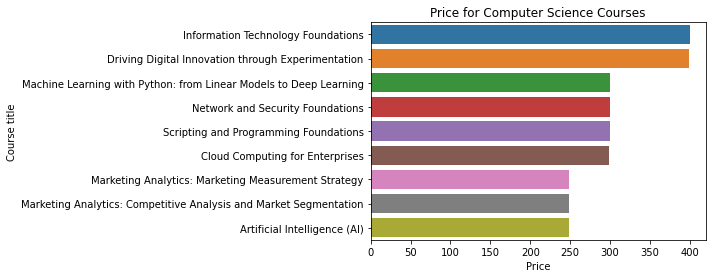

In [ ]:
sns.barplot(x = 'price', y = 'title', data = comp_sci_query)
plt.title("Price for Computer Science Courses")
plt.xlabel("Price")
plt.ylabel("Course title")
plt.show()

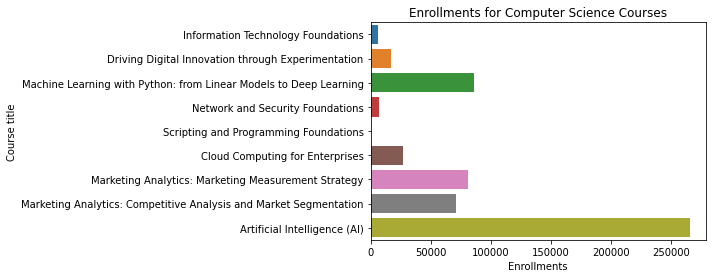

In [ ]:
sns.barplot(x = 'n_enrolled', y = 'title', data = comp_sci_query)
plt.title("Enrollments for Computer Science Courses")
plt.xlabel("Enrollments")
plt.ylabel("Course title")
plt.show()

<ipython-input-143-40f7870a85b7>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = 'price', y = 'n_enrolled', data = comp_sci_query,ci=False)


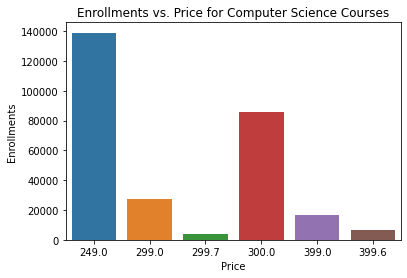

In [ ]:
sns.barplot(x = 'price', y = 'n_enrolled', data = comp_sci_query,ci=False)
plt.title("Enrollments vs. Price for Computer Science Courses")
plt.xlabel("Price")
plt.ylabel("Enrollments")
plt.show()

In [ ]:
data_analysis_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                                    FROM edx_course_descriptions 
                                    WHERE subject == 'Data Analysis & Statistics'
                                    ORDER BY price DESC ''', edx_conn)
data_analysis_tot

,total_program_enrollment,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,8528824,144,92.63875,25.0,350.0


In [ ]:
comp_sci_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_program_enrollment, COUNT(title) AS num_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Computer Science'
                               ORDER BY price DESC ''', edx_conn)
comp_sci_tot

,total_program_enrollment,num_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,24895474,332,125.012048,49.0,399.6


In [ ]:
edx_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_edx_enrollment, COUNT(title) AS total_courses, AVG(price) AS total_price_avg
                          FROM edx_course_descriptions
                          ORDER BY price DESC ''', edx_conn)
edx_tot

,total_edx_enrollment,total_courses,total_price_avg
0,91075200,1950,100.465497


In [ ]:
engineering_tot = pd.read_sql(''' SELECT SUM(n_enrolled) AS total_engineering_enrollment, COUNT(title) AS total_courses, AVG(price) AS avg_course_purchase, MIN(price) AS min_course_purchase, MAX(price) AS max_course_purchase
                               FROM edx_course_descriptions
                               WHERE subject == 'Engineering'
                               ORDER BY price DESC ''', edx_conn)
engineering_tot

,total_engineering_enrollment,total_courses,avg_course_purchase,min_course_purchase,max_course_purchase
0,2793678,116,116.982759,25.0,299.0


In [ ]:
by_subject = pd.read_sql(''' SELECT subject, COUNT(subject) AS subject_count,
                             100 * COUNT(subject) / (SELECT COUNT(*) FROM edx_course_descriptions) AS subject_pct
                             FROM edx_course_descriptions
                             GROUP BY subject
                             ORDER BY subject_pct DESC LIMIT 10''', edx_conn)
by_subject

,subject,subject_count,subject_pct
0,Computer Science,332,17
1,Business & Management,328,16
2,Data Analysis & Statistics,144,7
3,Humanities,128,6
4,Social Sciences,102,5
5,Engineering,116,5
6,Economics & Finance,92,4
7,Communication,78,4
8,Medicine,62,3
9,Math,62,3


In [ ]:
by_subject_csv = by_subject.to_csv('by_subject_csv.csv')

Text(0, 0.5, 'Subject')

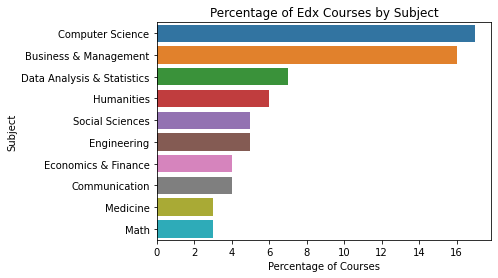

In [ ]:
sns.barplot(x = 'subject_pct', y = 'subject', data = by_subject)
plt.title("Percentage of Edx Courses by Subject")
plt.xlabel("Percentage of Courses")
plt.ylabel("Subject")

In [ ]:
edx_by_price = pd.read_sql(''' SELECT price, COUNT(price) AS price_count,
                           100 * COUNT(price) / (SELECT COUNT(*) FROM edx_course_descriptions) AS price_pct
                           FROM edx_course_descriptions
                           GROUP BY price
                           ORDER BY price_pct DESC LIMIT 10 ''', edx_conn)
edx_by_price

,price,price_count,price_pct
0,49.0,540,27
1,99.0,274,14
2,50.0,192,9
3,199.0,170,8
4,149.0,156,8
5,25.0,98,5
6,150.0,60,3
7,139.0,66,3
8,249.0,52,2
9,79.0,42,2


In [ ]:
edx_price_pct_csv = edx_by_price.to_csv('edx_price_pct.csv')

Text(0, 0.5, 'Price')

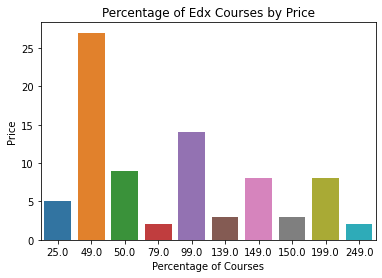

In [ ]:
sns.barplot(x = 'price', y = 'price_pct', data = edx_by_price)
plt.title("Percentage of Edx Courses by Price")
plt.xlabel("Percentage of Courses")
plt.ylabel("Price")

In [ ]:
by_course_effort = pd.read_sql(''' SELECT course_effort, COUNT(course_effort) AS num_hours, 
                                   100 * COUNT(course_effort) / (SELECT COUNT(*) FROM edx_course_descriptions) AS hours_pct
                                   FROM edx_course_descriptions 
                                   GROUP BY course_effort
                                   ORDER BY hours_pct DESC LIMIT 10 ''', edx_conn)
by_course_effort

,course_effort,num_hours,hours_pct
0,2–4 hours per week,216,11
1,3–5 hours per week,206,10
2,2–3 hours per week,208,10
3,3–4 hours per week,182,9
4,4–6 hours per week,158,8
5,8–10 hours per week,114,5
6,6–8 hours per week,102,5
7,4–5 hours per week,110,5
8,1–2 hours per week,110,5
9,5–7 hours per week,56,2


Text(0, 0.5, 'Course Effort')

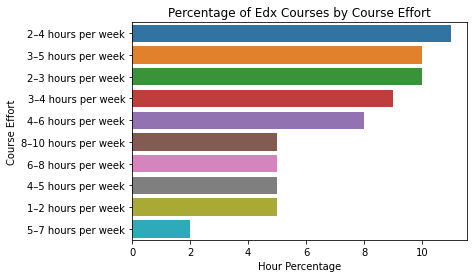

In [ ]:
sns.barplot(x = 'hours_pct', y = 'course_effort', data = by_course_effort)
plt.title("Percentage of Edx Courses by Course Effort")
plt.xlabel("Hour Percentage")
plt.ylabel("Course Effort")

In [ ]:
by_institution = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx_course_descriptions) AS institution_pct
                                 FROM edx_course_descriptions
                                 GROUP BY institution
                                 ORDER BY institution_pct DESC LIMIT 10''', edx_conn)
by_institution

,institution,institution_count,institution_pct
0,Harvard University,208,10
1,Universitat Politècnica de Valencia,94,4
2,Massachusetts Institute of Technology,82,4
3,IBM,60,3
4,Delft University of Technology,60,3
5,"University of California, Berkeley",40,2
6,The University of Queensland,52,2
7,The University of Michigan,44,2
8,Tecnológico de Monterrey,42,2
9,Stanford University,40,2


Text(0, 0.5, 'Institute')

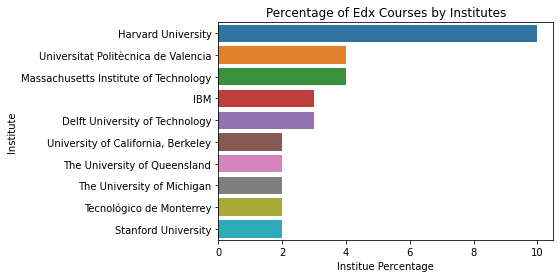

In [ ]:
sns.barplot(x = 'institution_pct', y = 'institution', data = by_institution)
plt.title("Percentage of Edx Courses by Institutes")
plt.xlabel("Institue Percentage")
plt.ylabel("Institute")

In [ ]:
by_institution_dsc = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx_course_descriptions) AS institution_pct
                                 FROM edx_course_descriptions
                                 WHERe subject == 'Data Analysis & Statistics'
                                 GROUP BY institution
                                 ORDER BY institution_count DESC LIMIT 10''', edx_conn)
by_institution_dsc

,institution,institution_count,institution_pct
0,IBM,40,2
1,Harvard University,36,1
2,Universidad Galileo,8,0
3,Tecnológico de Monterrey,8,0
4,Rolls-Royce,8,0
5,"The University of California, San Diego",6,0
6,Universitat Politècnica de Valencia,4,0
7,Massachusetts Institute of Technology,4,0
8,Inter-American Development Bank,4,0
9,École polytechnique fédérale de Lausanne,2,0


Text(0, 0.5, 'Institute')

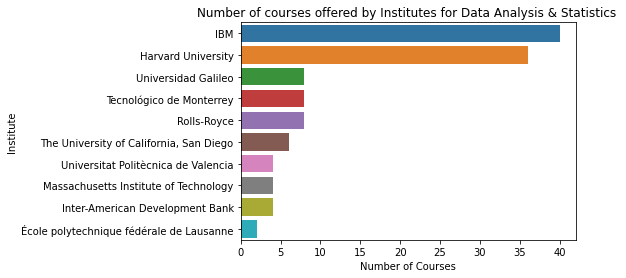

In [ ]:
sns.barplot(x = 'institution_count', y = 'institution', data = by_institution_dsc)
plt.title("Number of courses offered by Institutes for Data Analysis & Statistics ")
plt.xlabel("Number of Courses")
plt.ylabel("Institute")

In [ ]:
by_institution_comp_sci = pd.read_sql(''' SELECT institution, COUNT(institution) AS institution_count,
                                 100 * COUNT(institution) / (SELECT COUNT(*) FROM edx_course_descriptions) AS institution_pct
                                 FROM edx_course_descriptions
                                 WHERe subject == 'Computer Science'
                                 GROUP BY institution
                                 ORDER BY institution_count DESC LIMIT 10''', edx_conn)
by_institution_comp_sci 

,institution,institution_count,institution_pct
0,Universitat Politècnica de Valencia,26,1
1,IBM,20,1
2,"University of California, Berkeley",16,0
3,The Linux Foundation,16,0
4,Stanford University,16,0
5,Harvard University,16,0
6,Columbia University,14,0
7,Amazon Web Services,14,0
8,Dartmouth_IMTx-Dartmouth College-IMT,12,0
9,Curtin University,12,0


Text(0, 0.5, 'Institute')

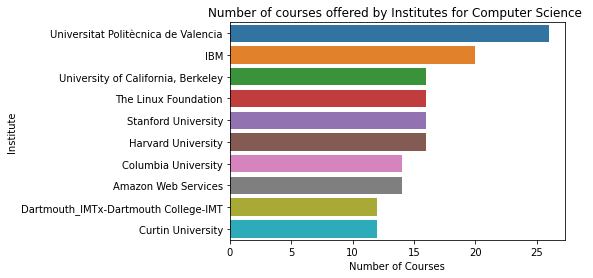

In [ ]:
sns.barplot(x = 'institution_count', y = 'institution', data = by_institution_comp_sci)
plt.title("Number of courses offered by Institutes for Computer Science ")
plt.xlabel("Number of Courses")
plt.ylabel("Institute")

In [ ]:
subject_hundred = pd.read_sql(''' SELECT subject, AVG(price) as AveragePrice
                                  FROM edx_course_descriptions
                                  WHERE price > 100.0 
                                  GROUP BY subject
                                  ORDER BY AveragePrice DESC LIMIT 10''', edx_conn)
subject_hundred = subject_hundred.round(2)
subject_hundred

,subject,AveragePrice
0,Education & Teacher Training,227.00
1,Data Analysis & Statistics,222.38
2,Economics & Finance,213.56
3,Chemistry,199.00
4,Engineering,192.96
5,Computer Science,189.61
6,Environmental Studies,189.00
7,Design,189.00
8,Art & Culture,185.00
9,Business & Management,183.19


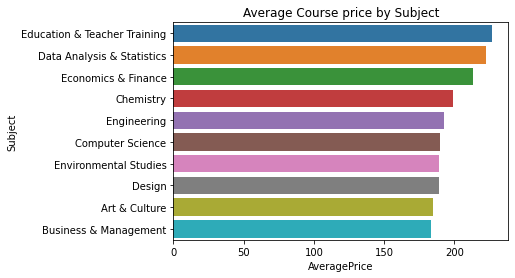

In [ ]:

sns.barplot(x = 'AveragePrice', y = 'subject', data = subject_hundred)
plt.title("Average Course price by Subject")

plt.ylabel("Subject")
plt.show()

In [ ]:
by_enroll = pd.read_sql(''' SELECT subject, SUM(n_enrolled) AS total_enrollment
                          FROM edx_course_descriptions 
                          GROUP BY subject
                          ORDER BY total_enrollment DESC LIMIT 10 ''', edx_conn)
by_enroll

,subject,total_enrollment
0,Computer Science,49790948
1,Business & Management,28306252
2,Communication,18565308
3,Data Analysis & Statistics,17057648
4,Humanities,14016560
5,Social Sciences,7377516
6,Biology & Life Sciences,7055328
7,Engineering,5587356
8,Language,4253028
9,Medicine,3959060


<class 'str'>
Enrollments


Text(0, 0.5, 'Subject')

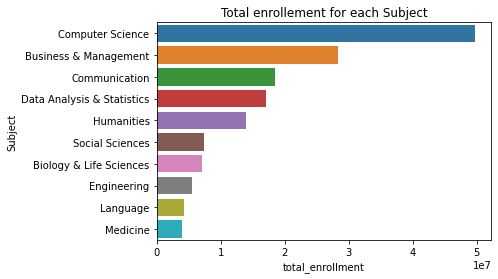

In [ ]:
by_enroll_csv = by_enroll.to_csv('by_enroll.csv')
sns.barplot(x = 'total_enrollment', y = 'subject', data = by_enroll)
plt.title('Total enrollement for each Subject')
print(type(plt.xlabel))
print(plt.xlabel)

plt.ylabel('Subject')

In [ ]:
by_avg_enroll = pd.read_sql(''' SELECT subject, AVG(n_enrolled) AS avg_enrollment
                          FROM edx_course_descriptions 
                          GROUP BY subject
                          ORDER BY avg_enrollment DESC LIMIT 10 ''', edx_conn)
by_avg_enroll

,subject,avg_enrollment
0,Communication,119008.384615
1,Architecture,91322.200000
2,Computer Science,74986.367470
3,Data Analysis & Statistics,59227.944444
4,Humanities,54752.187500
5,Biology & Life Sciences,50395.200000
6,Literature,47898.000000
7,Business & Management,43149.774390
8,Chemistry,39507.000000
9,Social Sciences,36164.294118


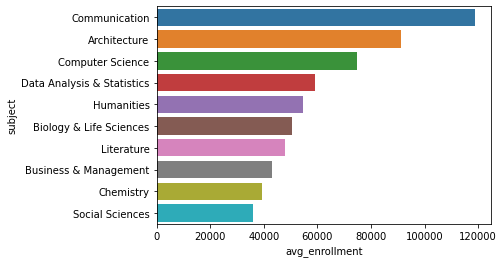

In [ ]:
sns.barplot(x = 'avg_enrollment', y = 'subject', data = by_avg_enroll)

**Competitor Analysis**

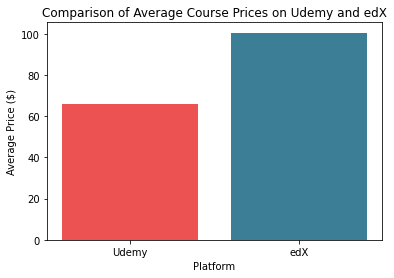

In [ ]:
udemy_avg_price = udemy_course_des['price'].mean()
udemy_avg_subs = udemy_course_des['num_subscribers'].mean()

edx_avg_price = edx_course_descriptions['price'].mean()
edx_avg_subs = edx_course_descriptions['n_enrolled'].mean()

# Create a bar plot to compare the average price of courses on each platform
fig, ax = plt.subplots()
ax.bar(['Udemy', 'edX'], [udemy_avg_price, edx_avg_price],color=['#EC5252', '#3C7E96'])
ax.set_xlabel('Platform')
ax.set_ylabel('Average Price ($)')
ax.set_title('Comparison of Average Course Prices on Udemy and edX')
plt.show()

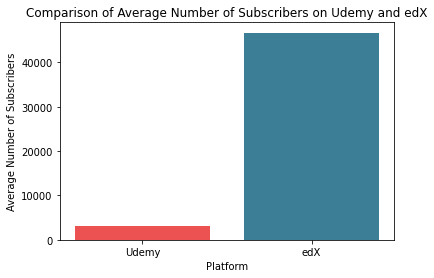

In [ ]:
fig, ax = plt.subplots()
ax.bar(['Udemy', 'edX'], [udemy_avg_subs, edx_avg_subs], color=['#EC5252', '#3C7E96'])
ax.set_xlabel('Platform')
ax.set_ylabel('Average Number of Subscribers')
ax.set_title('Comparison of Average Number of Subscribers on Udemy and edX')
plt.show()


In conclusion, this project analyzed data from Udemy and edX to gain insights into the courses available on these platforms. The analysis included data visualization using libraries such as seaborn, and SQL queries were used to extract the necessary data from the Kaggle dataset. The following are the key insights and observations from the analysis:

* edX has a higher average course price than Udemy. This suggests that edX courses are relatively more expensive, but it may also indicate that edX courses are of higher quality and provide more value to the learners.
* Udemy has a larger number of courses available compared to edX, and it covers a wider range of subjects. This indicates that Udemy is a more versatile platform, and learners have more options to choose from.

* The most popular subjects on both platforms are web development, business, and data science. This suggests that there is a high demand for courses in these subjects, and learners are actively seeking to improve their skills in these areas.

Overall, this project showcases my analytical skills, attention to detail, and proficiency in key data analysis tools, and demonstrates my ability to generate valuable insights and recommendations from complex datasets.



